# Visit the Sage site for more info: https://sagecontinuum.org

In [25]:
# Install requirements
! pip install --no-cache-dir -r requirements.txt -q

In [15]:
# Avoid an issue with the default cache dir
! export MPLCONFIGDIR="./"

In [16]:
%matplotlib inline

In [58]:
import sage_data_client
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.width = 120

In [108]:
# Get the last N hours of temperature data
df = sage_data_client.query(
    start="-12h",
    filter={
        "name": "env.temperature",
        "sensor": "bme680",
        "zone": "shield",
    }
)

In [109]:
print(df)

                                timestamp             name  value                meta.host   meta.job  \
0     2024-08-29 11:33:14.087653287+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
1     2024-08-29 11:33:44.118089864+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
2     2024-08-29 11:34:14.125188877+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
3     2024-08-29 11:34:44.147766030+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
4     2024-08-29 11:35:14.172694634+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
...                                   ...              ...    ...                      ...        ...   
51710 2024-08-29 23:31:04.328199150+00:00  env.temperature  23.77  0000e45f014524c6.ws-rpi  Pluginctl   
51711 2024-08-29 23:31:34.339174619+00:00  env.temperature  23.76  0000e45f014524c6.ws-rpi  Pluginctl   
51712 2024-08-29 23:32:04.355401523+00:00  env.temperat

In [110]:
# Check how many sensors acquired data
unique_sensors = df["meta.vsn"].unique()
print(f"Number of unique sensors: {len(unique_sensors)}")
print(f"Sensors:")
print(unique_sensors)

Number of unique sensors: 36
Sensors:
['W0AF' 'W0BE' 'W0A7' 'W0B0' 'W09F' 'W0B1' 'W0B3' 'W0B7' 'W01B' 'W096'
 'W022' 'W0B2' 'W0B5' 'W019' 'W023' 'W026' 'W01A' 'W014' 'W028' 'W08E'
 'W085' 'W05D' 'W08C' 'W088' 'W099' 'W065' 'W067' 'W06F' 'W0B9' 'W087'
 'W0BA' 'W058' 'W0AE' 'W06E' 'W0B4' 'W051']


W014
W019
W01A has suspicious data, skipping
W01B
W022
W023
W026
W028
W051
W058


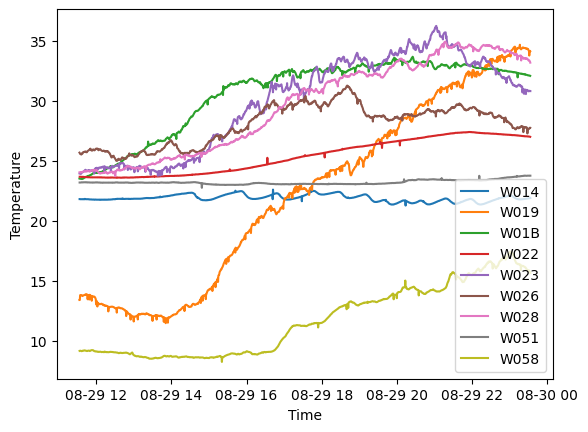

In [113]:
# Plot a few temperatures as time series
fig, ax = plt.subplots()
max_sensors = 10
for i, (vsn, group) in enumerate(df.groupby("meta.vsn")):
    if i >= max_sensors:
        break
    if group["value"].mean() < -100:
        print(f"{vsn} has suspicious data, skipping")
        continue
    print(vsn)
    ax.plot(group["timestamp"], group["value"], label=vsn)
leg = ax.legend()
xlabel = ax.set_xlabel("Time")
ylabel = ax.set_ylabel("Temperature")